<a href="https://colab.research.google.com/github/nan-park/section2_project/blob/main/us_data_prerprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# **1. 미국 기준금리 및 그에 따른 경제지표 데이터**
- **연준 기준금리** us_fed_funds_rate.csv
- **원유 가격(WTI)** wti_crude_oil_prices.csv
- **소비자 물가지수(CPI)** us_consumer_price_index.csv
- **국채 금리(3년물)(GS3)** us_GS3.csv
- **실업률** us_national_unemployment_rate.csv
- **GDP** us_GDP.csv


In [ ]:
from google.colab import files
files.upload();

Saving us_consumer_price_index.csv to us_consumer_price_index (3).csv
Saving us_fed_funds_rate.csv to us_fed_funds_rate (3).csv
Saving us_GDP.csv to us_GDP (3).csv
Saving us_GS3.csv to us_GS3 (3).csv
Saving us_national_unemployment_rate.csv to us_national_unemployment_rate (3).csv
Saving wti_crude_oil_prices.csv to wti_crude_oil_prices (3).csv


- 연준 기준금리

In [ ]:
url = "us_fed_funds_rate.csv" # 미국 연준 기준금리 데이터(1954.07.01~)(historical)
fed_funds_rate = pd.read_csv(url, header=8)

In [ ]:
# column 이름 변경 ' value' -> 'funds_rate'
fed_funds_rate.rename(columns={' value': 'funds_rate'}, inplace=True)

In [ ]:
fed_funds_rate.head()

,date,funds_rate
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


In [ ]:
fed_funds_rate.shape

(24450, 2)

In [ ]:
fed_funds_rate.isna().sum() # 결측치 존재

date           0
funds_rate    21
dtype: int64

In [ ]:
fed_funds_rate[fed_funds_rate.funds_rate.isna()==True].head()  # 2022.09.23부터 자료 없음 -> 제거

,date,funds_rate
24429,2022-09-23,NaN
24430,2022-09-24,NaN
24431,2022-09-25,NaN
24432,2022-09-26,NaN
24433,2022-09-27,NaN


In [ ]:
fed_funds_rate.head()

,date,funds_rate
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


In [ ]:
drop_index = fed_funds_rate[fed_funds_rate.funds_rate.isna()==True].index
fed_funds_rate = fed_funds_rate.drop(drop_index)
fed_funds_rate.isna().sum()

date          0
funds_rate    0
dtype: int64

In [ ]:
# datetime으로 바꾸기
test_date = '2022-10-11'
datetime.strptime(test_date, '%Y-%m-%d')  # yyyy-MM-dd 형식

datetime.datetime(2022, 10, 11, 0, 0)

In [ ]:
date_string = fed_funds_rate.date
kdate = [datetime.strptime(d, '%Y-%m-%d') for d in date_string]
fed_funds_rate.date = kdate
fed_funds_rate.set_index('date', inplace=True)  # index로 변경하기
fed_funds_rate.head()

,funds_rate
date,
1954-07-01,1.13
1954-07-02,1.25
1954-07-03,1.25
1954-07-04,1.25
1954-07-05,0.88


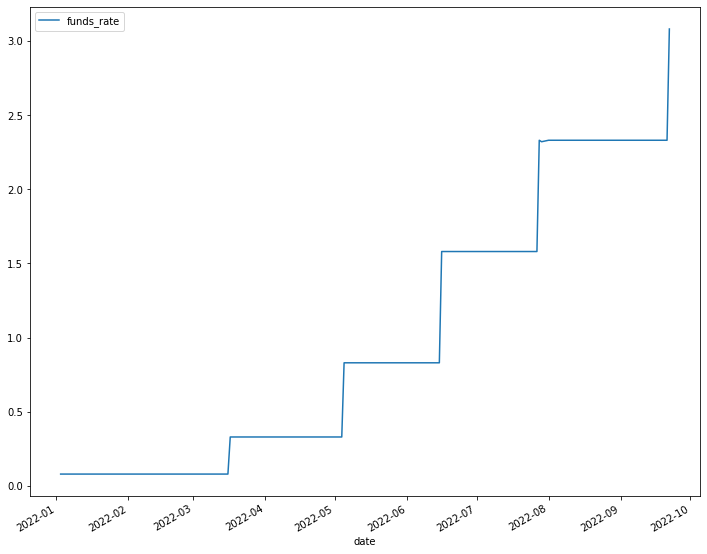

In [ ]:
fed_funds_rate.loc['2022'].plot(figsize=(12, 10))
plt.show()

- 국제 유가(WTI) 

In [ ]:
url = 'wti_crude_oil_prices.csv'  # 국제유가(1986.01.02~2022.09.19)
oil_price = pd.read_csv(url)

In [ ]:
oil_price.head()

,DATE,DCOILWTICO
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [ ]:
oil_price.columns

Index(['DATE', 'DCOILWTICO'], dtype='object')

In [ ]:
# column 이름 바꾸기
oil_price.rename(columns={'DATE':'date', 'DCOILWTICO':'oil_price'}, inplace=True);

In [ ]:
# datetime으로 바꾸기
date_string = oil_price.date
kdate = [datetime.strptime(d, '%Y-%m-%d') for d in date_string]
oil_price.date = kdate
oil_price.set_index('date', inplace=True)
oil_price.head()

,oil_price
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [ ]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9578 entries, 1986-01-02 to 2022-09-19
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   oil_price  9578 non-null   object
dtypes: object(1)
memory usage: 149.7+ KB


In [ ]:
missing_index = oil_price[oil_price.oil_price=='.'].index # 결측치인 값 존재 -> 결측치로 간주하도록 nan으로 바꾸기
oil_price.loc[missing_index].head() # 327개

,oil_price
date,
1986-02-17,.
1986-03-28,.
1986-05-26,.
1986-07-04,.
1986-09-01,.


In [ ]:
oil_price.loc[missing_index, 'oil_price'] = np.nan  # 결측치로 바꾸기
oil_price.oil_price = oil_price.oil_price.astype(float) # 나머지 float으로 바꾸기
oil_price.head()

,oil_price
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [ ]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9578 entries, 1986-01-02 to 2022-09-19
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   oil_price  9251 non-null   float64
dtypes: float64(1)
memory usage: 407.7 KB


In [ ]:
oil_price = oil_price.interpolate(method='time')  # 시계열 기준으로 interpolate 보간
oil_price.loc[missing_index].head()

,oil_price
date,
1986-02-17,15.0325
1986-03-28,11.0750
1986-05-26,15.5625
1986-07-04,11.5700
1986-09-01,16.3050


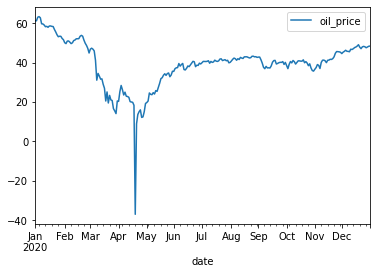

In [ ]:
oil_price.loc['2020'].plot();

- 소비자 물가지수(CPI)

In [ ]:
url = 'us_consumer_price_index.csv' # 소비자 물가지수(1960.01.01~2022.07.01 월별 데이터)(1960~2022). 2022.07.01이면 7월 데이터를 월초에 모아놓은 것 같음.
cpi = pd.read_csv(url)
cpi.head()  # (체크) 나중에 일별 데이터를 월별 데이터로 바꿀 필요성이 있음

,DATE,CPALTT01USM659N
0,1960-01-01,1.034483
1,1960-02-01,1.730104
2,1960-03-01,1.730104
3,1960-04-01,1.724138
4,1960-05-01,1.724138


In [ ]:
# columns 이름 바꾸기
cpi.rename(columns={'DATE':'date', 'CPALTT01USM659N':'CPI'}, inplace=True);

In [ ]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    751 non-null    object 
 1   CPI     751 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.9+ KB


In [ ]:
# to_datetime으로 바꾸기
cpi.date = pd.to_datetime(cpi.date)
cpi.set_index('date', inplace=True)
cpi.head()

,CPI
date,
1960-01-01,1.034483
1960-02-01,1.730104
1960-03-01,1.730104
1960-04-01,1.724138
1960-05-01,1.724138


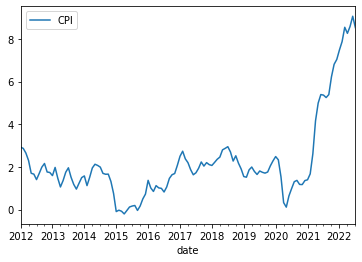

In [ ]:
cpi.loc['2012':'2022'].plot();

- 미국 국채 금리(3년물)(GS3)

In [ ]:
url = 'us_GS3.csv'  # 미국 국채금리 3년물(GS3) (1953.04.01~2022.08.01 월별 데이터)
gs3 = pd.read_csv(url)
gs3.head()

,DATE,GS3
0,1953-04-01,2.51
1,1953-05-01,2.72
2,1953-06-01,2.74
3,1953-07-01,2.62
4,1953-08-01,2.58


In [ ]:
gs3.info()  # 결측치 없음. 데이터타입 float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    833 non-null    object 
 1   GS3     833 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.1+ KB


In [ ]:
# columns 이름 바꾸기
gs3.rename(columns={'DATE':'date'}, inplace=True);

In [ ]:
# to_datetime으로 바꾸기
gs3.date = pd.to_datetime(gs3.date)
gs3.set_index('date', inplace=True)
gs3.head()

,GS3
date,
1953-04-01,2.51
1953-05-01,2.72
1953-06-01,2.74
1953-07-01,2.62
1953-08-01,2.58


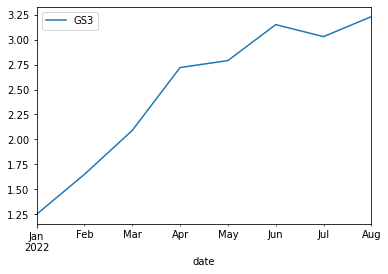

In [ ]:
gs3.loc['2022'].plot();

- 실업률

In [ ]:
url = 'us_national_unemployment_rate.csv' # 실업률(1948.01.01~2022.08.01) 월별 데이터
unemploy = pd.read_csv(url, header=8)
unemploy.head()

,date,value
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [ ]:
# column 이름 바꾸기
unemploy.rename(columns={' value':'unemployment_rate'}, inplace=True);

In [ ]:
# datetime 바꾸기
unemploy.date = pd.to_datetime(unemploy.date)
unemploy.set_index('date', inplace=True)
unemploy.head()

,unemployment_rate
date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


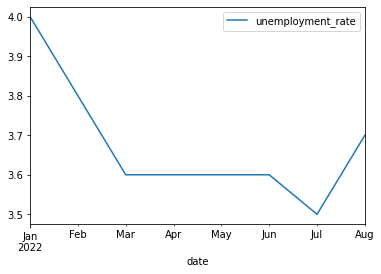

In [ ]:
unemploy.loc['2022'].plot();

- GDP

In [ ]:
url = 'us_GDP.csv'  # 분기별 데이터(Q1~Q4 3개월씩) -> 월별로 up-sampling하기 (1947.01.01~2022.04.01(1분기))
gdp = pd.read_csv(url)
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [ ]:
gdp.tail()  # 2022.04.01 데이터는 2022.04.01~2022.06.31 데이터를 합친 것 같음(분기초를 기준으로 잡음)

,DATE,GDP
297,2021-04-01,22740.959
298,2021-07-01,23202.344
299,2021-10-01,24002.815
300,2022-01-01,24386.734
301,2022-04-01,24882.878


In [ ]:
gdp.rename(columns={'DATE':'date'},inplace=True);

In [ ]:
# datetime 바꾸기
gdp.date = pd.to_datetime(gdp.date)
gdp.set_index('date', inplace=True)
gdp.head()

,GDP
date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [ ]:
# 월별 데이터로 upsampling 하기
gdp_upsample = gdp.resample('MS').mean()
gdp_upsample.head(10)

,GDP
date,
1947-01-01,243.164
1947-02-01,NaN
1947-03-01,NaN
1947-04-01,245.968
1947-05-01,NaN
1947-06-01,NaN
1947-07-01,249.585
1947-08-01,NaN
1947-09-01,NaN


In [ ]:
gdp_upsample.tail() # 실제 값은 4월~6월까지 데이터라고 간주하기 때문에, 6월까지 데이터 만들어놓자

,GDP
date,
2021-12-01,NaN
2022-01-01,24386.734
2022-02-01,NaN
2022-03-01,NaN
2022-04-01,24882.878


In [ ]:
series = pd.Series(np.nan,index=pd.date_range('2022-05-01', '2022-06-01', freq='MS'))
series

2022-05-01   NaN
2022-06-01   NaN
Freq: MS, dtype: float64

In [ ]:
gdp_upsample = pd.concat([gdp_upsample, series])
gdp_upsample.tail()

,GDP,0
2022-02-01,NaN,NaN
2022-03-01,NaN,NaN
2022-04-01,24882.878,NaN
2022-05-01,NaN,NaN
2022-06-01,NaN,NaN


In [ ]:
gdp_upsample.drop(0, axis=1, inplace=True)
gdp_upsample.head()

,GDP
1947-01-01,243.164
1947-02-01,NaN
1947-03-01,NaN
1947-04-01,245.968
1947-05-01,NaN


In [ ]:
# 분기(3개월) 전체의 데이터를 분기초에 넣어뒀기 때문에, 데이터 1개월씩 뒤로 미루기
gdp_upsample = gdp_upsample.shift(1)
gdp_upsample.head()

,GDP
1947-01-01,NaN
1947-02-01,243.164
1947-03-01,NaN
1947-04-01,NaN
1947-05-01,245.968


In [ ]:
# 결측치를 선형 보간 해주기
gdp_upsample = gdp_upsample.interpolate(method='linear')  # time이 아닌 이유는, 월마다 30, 31일로 달라서 의도와 달리 동일 간격이 아닐 수 있기 때문
gdp_upsample.head(10)

,GDP
1947-01-01,NaN
1947-02-01,243.164000
1947-03-01,244.098667
1947-04-01,245.033333
1947-05-01,245.968000
1947-06-01,247.173667
1947-07-01,248.379333
1947-08-01,249.585000
1947-09-01,252.971667
1947-10-01,256.358333


In [ ]:
# 맨앞 데이터는 손으로 선형보간해주자
temp = gdp_upsample.loc['1947-03-01'] - gdp_upsample.loc['1947-02-01']
gdp_upsample.loc['1947-01-01'] = gdp_upsample.loc['1947-02-01'] - temp
gdp_upsample.head()

,GDP
1947-01-01,242.229333
1947-02-01,243.164000
1947-03-01,244.098667
1947-04-01,245.033333
1947-05-01,245.968000


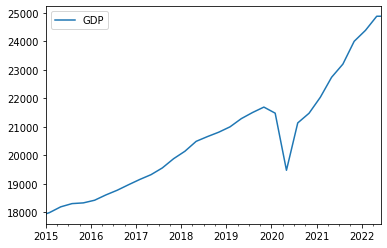

In [ ]:
gdp_upsample.loc['2015':'2022'].plot();

GDP는 절댓값보다는 **percent change(경제성장률)**이 더 중요하다<br>
원래 총생산 및 경제성장률(GDP)는 GDP의 연간 증가율을 백분율로 나타낸 것이다.<br>
다만 월별데이터이므로 여기서는 월별 증가율로 나타낸다<br>
((금월 GDP) - (전월 GDP)) / 전월 GDP * 100

In [ ]:
gdp_upsample.head()

,GDP
1947-01-01,242.229333
1947-02-01,243.164000
1947-03-01,244.098667
1947-04-01,245.033333
1947-05-01,245.968000


In [ ]:
gdp_upsample['economic_growth_rate'] = pd.Series() # 빈 컬럼 만들기
gdp_upsample.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,GDP,economic_growth_rate
1947-01-01,242.229333,NaN
1947-02-01,243.164000,NaN
1947-03-01,244.098667,NaN
1947-04-01,245.033333,NaN
1947-05-01,245.968000,NaN


In [ ]:
for i in range(len(gdp_upsample.index)):
  if i != 0:  # 0일 때는 이전 값이 없으므로 넘어가기
    present = gdp_upsample.iloc[i, 0]  # 금월 GDP
    past = gdp_upsample.iloc[i-1, 0]   # 전월 GDP
    gdp_upsample.iloc[i, 1] = (present - past) / past * 100
gdp_upsample

,GDP,economic_growth_rate
1947-01-01,242.229333,NaN
1947-02-01,243.164000,0.385860
1947-03-01,244.098667,0.384377
1947-04-01,245.033333,0.382905
1947-05-01,245.968000,0.381445
...,...,...
2022-02-01,24386.734000,0.527533
2022-03-01,24552.115333,0.678161
2022-04-01,24717.496667,0.673593
2022-05-01,24882.878000,0.669086


마지막 6월 경제성장률이 0인 이유는, 분기별 데이터를 선형보간해주는 과정에서 5월 데이터를 그대로 가져왔기 때문.<br> 6월 데이터는 삭제하는 것이 좋을 듯.

In [ ]:
gdp_upsample = gdp_upsample.drop(gdp_upsample.index[-1])
gdp_upsample.tail()

,GDP,economic_growth_rate
2022-01-01,24258.761000,0.530331
2022-02-01,24386.734000,0.527533
2022-03-01,24552.115333,0.678161
2022-04-01,24717.496667,0.673593
2022-05-01,24882.878000,0.669086


# **미국 경제지표 데이터 합치기**
- 일별 데이터를 월별로 합쳐줄 필요가 있음(fed_funds_rate, oil_price)<br>
다만, 일별데이터로서 가치가 있는 데이터이기 때문에 따로 저장해줄 필요 있음

In [ ]:
fed_funds_rate.head() # 1954.07.01~2022.09.22 일별 데이터

,funds_rate
date,
1954-07-01,1.13
1954-07-02,1.25
1954-07-03,1.25
1954-07-04,1.25
1954-07-05,0.88


In [ ]:
# 월별 평균 데이터로 만들기
monthly_fed_funds_rate = fed_funds_rate.resample('MS').mean()
monthly_fed_funds_rate

,funds_rate
date,
1954-07-01,0.799355
1954-08-01,1.220645
1954-09-01,1.066667
1954-10-01,0.848710
1954-11-01,0.833667
...,...
2022-05-01,0.758571
2022-06-01,1.187143
2022-07-01,1.654500


In [ ]:
oil_price.head() # 1986.01.02~2022.09.19 일별 데이터

,oil_price
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [ ]:
monthly_oil_price = oil_price.resample('MS').mean()
monthly_oil_price.head()

,oil_price
date,
1986-01-01,22.925455
1986-02-01,15.433625
1986-03-01,12.539286
1986-04-01,12.843636
1986-05-01,15.386023


- 월별 데이터 모두 합치기

In [ ]:
us_df = pd.concat([monthly_fed_funds_rate, monthly_oil_price, cpi, gs3, unemploy, gdp_upsample], axis=1)
us_df

,funds_rate,oil_price,CPI,GS3,unemployment_rate,GDP,economic_growth_rate
1947-01-01,NaN,NaN,NaN,NaN,NaN,242.229333,NaN
1947-02-01,NaN,NaN,NaN,NaN,NaN,243.164000,0.385860
1947-03-01,NaN,NaN,NaN,NaN,NaN,244.098667,0.384377
1947-04-01,NaN,NaN,NaN,NaN,NaN,245.033333,0.382905
1947-05-01,NaN,NaN,NaN,NaN,NaN,245.968000,0.381445
...,...,...,...,...,...,...,...
2022-05-01,0.758571,109.778409,8.581512,2.79,3.6,24882.878000,0.669086
2022-06-01,1.187143,114.628977,9.059758,3.15,3.6,NaN,NaN
2022-07-01,1.654500,101.719881,8.524815,3.03,3.5,NaN,NaN
2022-08-01,2.330000,93.665217,NaN,3.23,3.7,NaN,NaN


In [ ]:
# 드라이브에 저장
# import sys

# if "google.colab" in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')
us_df.to_csv("/content/drive/MyDrive/us_economic_data.csv")

공통된 부분 -> 1986-01-01 ~ 2022-05-01<br>
공통된 부분만 남기고 모두 제거하도록 한다.<br>
단, 이외의 데이터, 특히 가장 최근 데이터(6~9월)도 중요하기 때문에 따로 저장한다

In [ ]:
us_df_clean = us_df.copy()
us_df_clean = us_df_clean.dropna()
us_df_clean

,funds_rate,oil_price,CPI,GS3,unemployment_rate,GDP,economic_growth_rate
1986-01-01,8.144839,22.925455,3.886256,8.41,6.7,4486.627333,0.476259
1986-02-01,7.860000,15.433625,3.113208,8.10,7.2,4507.894000,0.474001
1986-03-01,7.479032,12.539286,2.255639,7.30,7.2,4520.376000,0.276892
1986-04-01,6.988000,12.843636,1.590271,6.86,7.1,4532.858000,0.276127
1986-05-01,6.852903,15.386023,1.491146,7.27,7.2,4545.340000,0.275367
...,...,...,...,...,...,...,...
2022-01-01,0.080000,83.307619,7.479872,1.25,4.0,24258.761000,0.530331
2022-02-01,0.080000,91.653875,7.871064,1.65,3.8,24386.734000,0.527533
2022-03-01,0.199565,108.502609,8.542456,2.09,3.6,24552.115333,0.678161
2022-04-01,0.330000,102.035238,8.258629,2.72,3.6,24717.496667,0.673593


In [ ]:
# 드라이브에 저장
us_df_clean.to_csv("/content/drive/MyDrive/us_economic_data_clean.csv")